# REGRESSAO LINEAR

## BASE PLANO DE SAÚDE I

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from yellowbrick.regressor import ResidualsPlot

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
#conda install -c conda-forge yellowbrick

In [3]:
base = pd.read_csv('plano_saude.csv')
base

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


In [4]:
#Separando X e Y
X = base.iloc[:,0].values
y = base.iloc[:,1].values

In [5]:
# Correlacao
correlacao = np.corrcoef(X, y)
correlacao

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

In [6]:
base.corr()

,idade,custo
idade,1.00000,0.93092
custo,0.93092,1.00000


In [7]:
X = X.reshape(-1, 1)

In [8]:
# Regressao Linear
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [9]:
#b0
regressor.intercept_

-558.9490909090912

In [10]:
#b1
regressor.coef_

array([61.86787879])

Text(0, 0.5, 'Custo')

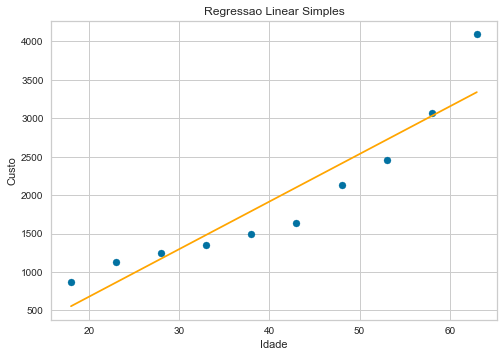

In [11]:
# Visualizando
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), color = 'orange')
plt.title('Regressao Linear Simples')
plt.xlabel('Idade')
plt.ylabel('Custo')

In [12]:
# prevendo1
previsao1 = regressor.predict([[40]])
previsao1

array([1915.76606061])

In [13]:
previsao2 = regressor.intercept_ + regressor.coef_ * 40
previsao2

array([1915.76606061])

In [14]:
# Score
score = regressor.score(X, y)
score

0.8666112727879174

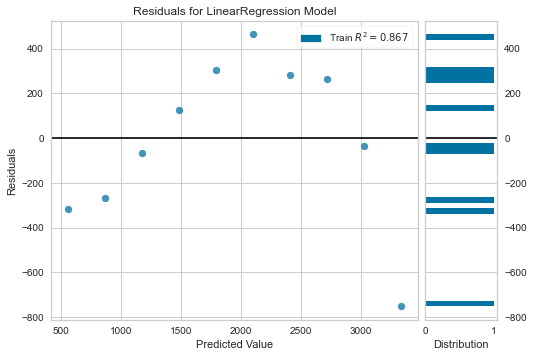

In [18]:
# residuos / Visualizando com Yellowbrick
visualizador = ResidualsPlot(regressor)
visualizador.fit(X, y) 
visualizador.poof();

## HOUSE PRICES 

### REGRESSAO LINEAR SIMPLES

In [19]:
base = pd.read_csv('house_prices.csv')
base

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [27]:
# Separando X e Y
X = base.iloc[:, 5:6].values
y = base.iloc[:, 2].values 

In [34]:
# Separando X e Y de teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [30]:
# treinando
regressor = LinearRegression()
regressor.fit(X_train, y_train)
score = regressor.score(X_train, X_train)

score

-416703.72339370404

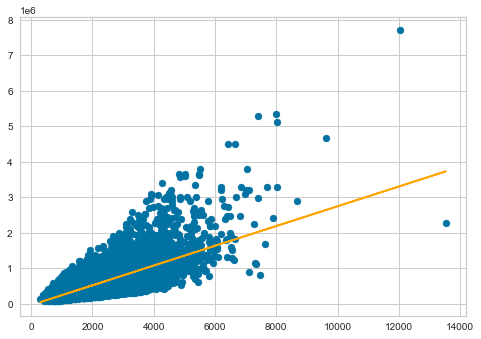

In [32]:
# Visualizando
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color = 'orange');

In [36]:
# Visualizando as diferencas
previsoes = regressor.predict(X_test)
resultado = abs(y_test - previsoes)
resultado

array([ 63116.30871034, 316099.00641905, 199200.40522524, ...,
       180512.90534826, 106032.73903242, 123500.16200177])

In [37]:
# media da diferenca nos resultados
resultado.mean()

172604.1288999542

In [40]:
# mean absolute error
mae = mean_absolute_error(y_test, previsoes)
mae

172604.1288999542

In [41]:
# Mean squared error
mse = mean_squared_error(y_test, previsoes)
mse

70170013932.11592

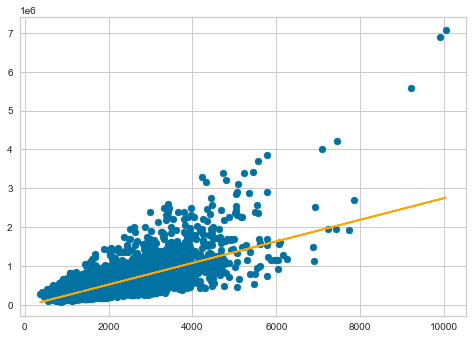

In [42]:
# Visualizando
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), color = 'orange');

### REGRESSAO LINEAR MULTIPLA

In [3]:
base = pd.read_csv('house_prices.csv')
base

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
# Separando X e Y
X = base.iloc[:, 3:19].values
y = base.iloc[:, 2].values

In [5]:
# Separando X e Y de teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [9]:
# treinando
regressor = LinearRegression()
regressor.fit(X_train, y_train)

score = regressor.score(X_train, y_train)
score

0.7029888085955013

In [10]:
previsoes = regressor.predict(X_test)

mae = mean_absolute_error(y_test, previsoes)
mae

123888.44377485049

In [11]:
mse = mean_squared_error(y_test, previsoes)
mse

42760757001.538025

In [12]:
regressor.score(X_test, y_test)

0.6885414149062536